In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
import os

In [62]:
# df_native = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz/RNAz_Excel/native.xlsx"))
# df_sissiz_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz/RNAz_Excel/sissiz_mono.xlsx"))
# df_sissiz_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz/RNAz_Excel/sissiz_di.xlsx"))
# df_multiperm_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz/RNAz_Excel/multiperm_mono.xlsx"))
# df_multiperm_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz/RNAz_Excel/multiperm_di.xlsx"))
# df_aln_shuffle = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz/RNAz_Excel/alifoldz.xlsx"))

In [63]:
df_native = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz_Excel/native.xlsx"))
df_sissiz_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz_Excel/sissiz_mono.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz_Excel/sissiz_di.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz_Excel/multiperm_mono.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz_Excel/multiperm_di.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz_Excel/alifoldz.xlsx"))

save_path = "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Native/RNAz/"

In [64]:
new_df_native = df_native.drop(['Sequences', 'Columns'], axis=1)
new_df_native.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,73.23,0.43217,0.59581,-55.82,-36.30,-30.79,-5.51,1.68,-7.59,0.65,3.51,0.998835,ar14_01.txt
1,75.15,0.37958,0.59846,-56.11,-36.36,-30.74,-5.62,1.63,-8.71,0.65,3.04,0.997101,ar14_02.txt
2,74.50,0.40044,0.61253,-55.59,-39.34,-34.11,-5.23,1.75,-7.50,0.71,3.25,0.998087,ar14_03.txt
3,67.51,0.54218,0.61415,-55.79,-36.66,-31.10,-5.56,1.94,-6.60,0.66,4.27,0.999729,ar14_04.txt
4,64.07,0.60448,0.62723,-57.27,-33.21,-26.17,-7.04,2.10,-6.54,0.58,4.79,0.999901,ar14_05.txt
5,71.64,0.48456,0.62028,-55.53,-32.10,-27.34,-4.75,1.70,-6.32,0.58,4.72,0.999887,ar14_06.txt
6,76.54,0.39815,0.61383,-53.54,-23.73,-21.86,-1.87,1.58,-4.54,0.44,3.92,0.999468,ar14_07.txt
7,55.21,0.78533,0.62569,-59.09,-39.04,-31.39,-7.66,2.39,-6.95,0.66,4.13,0.999650,ar14_08.txt
8,52.33,0.81508,0.63236,-57.44,-39.80,-30.21,-9.59,2.56,-6.13,0.69,4.66,0.999874,ar14_09.txt
9,58.50,0.70275,0.62446,-57.16,-35.96,-27.66,-8.30,2.39,-7.48,0.63,3.77,0.999293,ar14_10.txt


In [65]:
new_df_sissiz_mono = df_sissiz_mono.drop(['Sequences', 'Columns'], axis=1)
new_df_sissiz_mono.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,71.62,0.47522,0.63298,-42.75,-6.96,-7.47,0.51,1.27,0.02,0.16,-6.82,0.000002,neg_sample_SISSIz_mono_ar14_01.txt
1,75.73,0.38323,0.65136,-26.97,-3.81,-3.81,0.00,1.00,0.17,0.14,-7.99,0.000000,neg_sample_SISSIz_mono_ar14_02.txt
2,76.35,0.37844,0.65596,-37.68,-9.51,-10.59,1.08,1.05,1.05,0.25,-8.54,0.000000,neg_sample_SISSIz_mono_ar14_03.txt
3,66.87,0.57130,0.66696,-38.68,-3.03,-3.40,0.37,1.67,0.35,0.08,-7.60,0.000000,neg_sample_SISSIz_mono_ar14_04.txt
4,62.85,0.64784,0.67872,-35.82,-1.29,-2.21,0.92,1.40,0.19,0.04,-7.31,0.000001,neg_sample_SISSIz_mono_ar14_05.txt
5,71.00,0.50486,0.57979,-40.06,-5.52,-5.62,0.10,1.17,-0.48,0.14,-5.84,0.000013,neg_sample_SISSIz_mono_ar14_06.txt
6,77.60,0.38216,0.64109,-43.24,-14.19,-14.99,0.80,1.21,0.09,0.33,-6.03,0.000009,neg_sample_SISSIz_mono_ar14_07.txt
7,56.43,0.78026,0.61341,-22.16,-0.04,-0.19,0.14,1.00,0.21,0.00,-7.08,0.000001,neg_sample_SISSIz_mono_ar14_08.txt
8,49.70,0.88640,0.63628,-28.09,0.00,0.00,0.00,0.00,-0.30,-0.00,-5.50,0.000024,neg_sample_SISSIz_mono_ar14_09.txt
9,61.53,0.65862,0.66451,-37.76,-3.43,-4.65,1.23,1.36,-0.11,0.09,-6.10,0.000008,neg_sample_SISSIz_mono_ar14_10.txt


In [66]:
new_df_sissiz_mono[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,66.741005,0.397239,0.501584,-39.106538,-6.096114,-6.310351,0.214274,0.570884,-4.093039,0.129431,-6.331501,0.133326
std,20.766247,0.279024,0.103117,50.822164,18.211542,18.628365,0.670976,0.558591,11.821244,0.210419,4.103995,0.337171
min,25.070000,-0.000000,0.219780,-354.580000,-273.600000,-276.310000,-0.920000,0.000000,-75.800000,-0.000000,-11.600000,0.000000
25%,48.740000,0.156080,0.421463,-37.540000,-6.070000,-6.320000,0.000000,0.000000,-0.577500,0.000000,-8.970000,0.000000
50%,66.135000,0.371300,0.510165,-21.365000,-0.300000,-0.355000,0.000000,1.000000,-0.080000,0.010000,-7.530000,0.000000
75%,85.115000,0.633280,0.578475,-13.695000,0.000000,0.000000,0.140000,1.040000,0.350000,0.180000,-5.737500,0.000016
max,100.000000,1.094490,0.789520,0.000000,0.000000,0.620000,6.170000,2.000000,5.380000,0.950000,4.370000,0.999779


In [67]:
new_df_sissiz_di = df_sissiz_di.drop(['Sequences', 'Columns'], axis=1)
new_df_sissiz_di.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,76.58,0.38762,0.62374,-27.67,-6.30,-6.83,0.53,1.17,0.34,0.23,-7.45,0.000001,neg_sample_SISSIz_di_ar14_01.txt
1,79.13,0.33123,0.61008,-14.57,-1.68,-1.68,0.00,1.00,-0.42,0.12,-7.45,0.000001,neg_sample_SISSIz_di_ar14_02.txt
2,74.96,0.40154,0.57569,-20.24,-0.65,-1.06,0.41,1.08,-0.57,0.03,-7.48,0.000001,neg_sample_SISSIz_di_ar14_03.txt
3,68.57,0.54490,0.66368,-17.97,0.00,0.00,0.00,0.00,0.29,-0.00,-8.42,0.000000,neg_sample_SISSIz_di_ar14_04.txt
4,64.84,0.60659,0.67578,-30.66,-8.30,-8.18,-0.12,1.12,0.45,0.27,-5.22,0.000041,neg_sample_SISSIz_di_ar14_05.txt
5,70.41,0.51135,0.61695,-36.79,-6.11,-6.40,0.29,1.00,0.01,0.17,-6.40,0.000004,neg_sample_SISSIz_di_ar14_06.txt
6,76.17,0.40577,0.57619,-16.03,-2.14,-2.53,0.39,1.20,0.37,0.13,-8.25,0.000000,neg_sample_SISSIz_di_ar14_07.txt
7,53.95,0.80380,0.63949,-33.25,0.00,0.00,0.00,0.00,-0.62,-0.00,-5.31,0.000035,neg_sample_SISSIz_di_ar14_08.txt
8,56.72,0.74037,0.65389,-32.29,-3.36,-3.79,0.43,1.00,-0.61,0.10,-4.43,0.000191,neg_sample_SISSIz_di_ar14_09.txt
9,60.81,0.66821,0.61425,-29.18,-0.09,-0.23,0.14,1.00,0.00,0.00,-7.30,0.000001,neg_sample_SISSIz_di_ar14_10.txt


In [68]:
new_df_sissiz_di[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.00000,826.000000,826.000000,826.000000
mean,67.227700,0.389611,0.503892,-38.724286,-6.251913,-6.471065,0.219237,0.555557,-4.33954,0.125303,-6.378511,0.132535
std,20.604206,0.275368,0.108577,51.876227,18.504603,18.957865,0.709015,0.554924,12.83172,0.207153,4.140311,0.337037
min,23.930000,-0.000000,0.204330,-367.380000,-229.560000,-230.880000,-0.810000,0.000000,-86.24000,-0.000000,-11.890000,0.000000
25%,49.602500,0.150157,0.419023,-34.985000,-6.100000,-6.535000,0.000000,0.000000,-0.61750,0.000000,-9.070000,0.000000
50%,66.650000,0.361645,0.511475,-21.130000,-0.105000,-0.145000,0.000000,0.970000,-0.05500,0.010000,-7.550000,0.000000
75%,85.532500,0.614328,0.580923,-13.215000,0.000000,0.000000,0.140000,1.000000,0.36000,0.170000,-5.767500,0.000015
max,100.000000,1.078720,0.897970,0.000000,0.000000,0.130000,6.200000,2.250000,9.12000,0.940000,4.350000,0.999771


In [69]:
new_df_multiperm_mono = df_multiperm_mono.drop(['Sequences', 'Columns'], axis=1)
new_df_multiperm_mono.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,64.53,0.71468,0.71649,-39.69,-3.11,-3.26,0.14,1.00,0.01,0.08,-6.12,0.000007,neg_sample_MULTIPERM_mono_ar14_01.txt
1,64.92,0.71288,0.70800,-35.91,-4.94,-5.94,1.00,1.00,0.46,0.14,-6.21,0.000006,neg_sample_MULTIPERM_mono_ar14_02.txt
2,64.72,0.71600,0.72475,-42.67,-6.25,-7.90,1.65,1.27,-0.44,0.15,-4.25,0.000270,neg_sample_MULTIPERM_mono_ar14_03.txt
3,59.11,0.80127,0.72728,-39.10,-1.01,-1.31,0.31,1.50,0.57,0.03,-7.29,0.000001,neg_sample_MULTIPERM_mono_ar14_04.txt
4,57.71,0.83521,0.72679,-45.40,-0.47,-1.41,0.94,1.43,-0.53,0.01,-5.19,0.000044,neg_sample_MULTIPERM_mono_ar14_05.txt
5,61.29,0.79387,0.72911,-44.60,-7.01,-7.14,0.12,1.23,0.14,0.16,-4.85,0.000085,neg_sample_MULTIPERM_mono_ar14_06.txt
6,65.72,0.70297,0.72150,-48.11,-6.53,-7.24,0.71,1.00,-0.66,0.14,-4.01,0.000431,neg_sample_MULTIPERM_mono_ar14_07.txt
7,50.20,0.98996,0.75025,-45.00,0.00,0.00,0.00,0.00,-0.17,-0.00,-5.19,0.000044,neg_sample_MULTIPERM_mono_ar14_08.txt
8,48.05,1.02291,0.73580,-45.54,0.00,0.00,0.00,0.00,0.14,-0.00,-5.67,0.000017,neg_sample_MULTIPERM_mono_ar14_09.txt
9,53.25,0.92328,0.72281,-41.96,-1.87,-2.30,0.43,1.00,-0.05,0.04,-5.36,0.000032,neg_sample_MULTIPERM_mono_ar14_10.txt


In [70]:
new_df_multiperm_mono[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,58.695702,0.795959,0.618955,-43.189310,-5.121356,-5.398366,0.276985,0.633971,-3.706695,0.110315,-4.228208,0.135328
std,15.307771,0.270307,0.073188,53.740545,13.684774,14.212417,0.745945,0.639598,10.416822,0.165154,3.505374,0.340698
min,25.520000,0.163340,0.441750,-364.960000,-180.210000,-183.860000,-1.530000,0.000000,-60.340000,-0.000000,-11.000000,0.000000
25%,45.997500,0.566307,0.558627,-42.252500,-4.750000,-5.282500,0.000000,0.000000,-0.487500,0.000000,-6.230000,0.000006
50%,57.805000,0.804290,0.630540,-24.510000,-0.340000,-0.420000,0.000000,1.000000,-0.060000,0.010000,-5.140000,0.000048
75%,72.560000,1.024843,0.674797,-15.755000,0.000000,0.000000,0.290000,1.200000,0.250000,0.180000,-3.860000,0.000575
max,92.320000,1.404840,0.830510,-1.910000,0.000000,0.410000,7.410000,2.500000,2.040000,0.770000,4.670000,0.999876


In [71]:
new_df_multiperm_di = df_multiperm_di.drop(['Sequences', 'Columns'], axis=1)
new_df_multiperm_di.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,64.34,0.71742,0.72007,-41.00,-7.92,-7.80,-0.12,1.12,-0.29,0.19,-3.99,0.000445,neg_sample_MULTIPERM_di_ar14_01.txt
1,66.01,0.68280,0.70318,-36.81,-6.56,-7.18,0.61,1.27,0.03,0.18,-5.03,0.000060,neg_sample_MULTIPERM_di_ar14_02.txt
2,65.38,0.69978,0.72952,-38.84,-6.83,-6.77,-0.06,1.33,0.13,0.18,-5.11,0.000051,neg_sample_MULTIPERM_di_ar14_03.txt
3,59.49,0.79404,0.71462,-41.18,-6.70,-7.94,1.25,1.21,-0.04,0.16,-4.48,0.000174,neg_sample_MULTIPERM_di_ar14_04.txt
4,57.86,0.82779,0.73178,-47.93,-2.60,-2.72,0.12,1.33,-0.60,0.05,-4.59,0.000140,neg_sample_MULTIPERM_di_ar14_05.txt
5,61.96,0.77353,0.73830,-50.89,-9.86,-10.72,0.86,1.00,-0.76,0.19,-2.60,0.006438,neg_sample_MULTIPERM_di_ar14_06.txt
6,64.29,0.73507,0.72934,-47.67,-14.37,-14.66,0.29,1.00,-0.39,0.30,-2.08,0.017361,neg_sample_MULTIPERM_di_ar14_07.txt
7,51.17,0.97100,0.73495,-51.36,-4.01,-5.13,1.12,1.22,-1.22,0.08,-1.97,0.021460,neg_sample_MULTIPERM_di_ar14_08.txt
8,47.97,1.02443,0.74761,-43.76,-2.13,-2.37,0.25,1.25,0.05,0.05,-4.96,0.000069,neg_sample_MULTIPERM_di_ar14_09.txt
9,52.31,0.96505,0.73116,-42.72,-0.32,-0.76,0.44,1.20,-0.78,0.01,-3.87,0.000562,neg_sample_MULTIPERM_di_ar14_10.txt


In [72]:
new_df_multiperm_di[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,58.744988,0.794808,0.618032,-43.364031,-7.784479,-8.148184,0.363680,0.805206,-3.796889,0.158777,-3.668753,0.145733
std,15.316636,0.271161,0.073125,53.888376,15.649336,16.174381,0.855885,0.592598,10.551434,0.183857,3.503926,0.344571
min,24.770000,0.135690,0.437980,-366.170000,-182.450000,-183.390000,-3.300000,0.000000,-60.250000,-0.000000,-10.890000,0.000000
25%,46.120000,0.562323,0.558428,-41.887500,-9.175000,-9.852500,0.000000,0.000000,-0.580000,0.000000,-5.680000,0.000017
50%,58.100000,0.812590,0.628390,-24.625000,-2.575000,-2.665000,0.000000,1.000000,-0.145000,0.090000,-4.560000,0.000148
75%,72.495000,1.023448,0.675475,-15.770000,0.000000,0.000000,0.447500,1.217500,0.240000,0.270000,-3.052500,0.002725
max,93.390000,1.354400,0.816750,-1.470000,0.000000,0.000000,8.320000,2.800000,2.140000,0.950000,4.760000,0.999895


In [73]:
new_df_aln_shuffle = df_aln_shuffle.drop(['Sequences', 'Columns', 'File'], axis=1)
new_df_aln_shuffle.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
0,56.94,0.79182,0.57951,-6.21,0.00,0.00,0.00,0.00,1.31,-0.00,-8.75,0.000000
1,43.29,1.06126,0.61978,-12.33,-7.31,-7.02,-0.29,2.30,-1.01,0.59,3.15,0.997665
2,48.87,0.94705,0.57052,-8.55,0.00,0.00,0.00,0.00,-0.01,-0.00,-5.76,0.000014
3,66.18,0.47958,0.53469,-2.86,0.00,0.00,0.00,0.00,2.36,-0.00,-10.47,0.000000
4,83.71,0.27318,0.53234,-27.16,-8.18,-7.81,-0.37,1.13,-0.03,0.30,-7.22,0.000001
5,62.23,0.62986,0.52104,-16.94,-3.88,-3.88,-0.00,1.00,0.36,0.23,-5.38,0.000030
6,83.36,0.28903,0.52758,-18.52,-9.12,-9.41,0.29,1.38,0.68,0.49,-6.78,0.000002
7,100.00,-0.00000,0.44000,-1.30,-0.50,-0.50,0.00,1.00,1.36,0.38,-11.33,0.000000
8,76.52,0.42946,0.52794,-42.96,-20.14,-20.86,0.72,1.13,0.49,0.47,-4.88,0.000080
9,93.65,0.10781,0.58958,-68.81,-48.20,-47.75,-0.45,1.04,-0.79,0.70,-3.32,0.001604


In [74]:
new_df_aln_shuffle[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,67.101145,0.392327,0.515325,-42.953649,-10.898247,-8.878032,-2.019964,1.471968,-5.603739,0.294615,-3.534758,0.382323
std,22.000527,0.301466,0.098148,56.040339,20.607144,20.407846,2.855659,1.086551,12.895626,0.286921,5.793475,0.474429
min,0.000000,-0.000000,0.138890,-305.310000,-216.850000,-216.430000,-11.530000,0.000000,-67.830000,-0.000000,-11.330000,0.000000
25%,48.495000,0.121775,0.440130,-38.850000,-14.505000,-9.935000,-4.545000,1.000000,-1.870000,0.020000,-9.170000,0.000000
50%,63.450000,0.347290,0.534690,-23.370000,-6.320000,-4.430000,-0.120000,1.250000,-0.570000,0.190000,-4.740000,0.000105
75%,87.890000,0.682000,0.584660,-13.345000,-0.500000,0.000000,0.000000,2.470000,0.405000,0.535000,2.990000,0.996816
max,100.000000,1.135490,0.800000,0.000000,0.000000,4.340000,3.310000,3.830000,9.810000,1.000000,5.340000,0.999966


In [75]:
def plot_columns(columnname):
    dataframes = [new_df_native, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
    labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
    data = [df[columnname] for df in dataframes]
    # thresholds = [0.9]

    plt.figure(figsize=(12, 8))
    plt.boxplot(data, labels=labels)

    # for t in thresholds:
    #     plt.axhline(y=t, color='red', linestyle='--', linewidth=1)

    plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
    plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
    plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

    if save_path:
        filename = os.path.join(save_path, f"RNAz: Boxplot {columnname} with native samples")
        plt.savefig(filename, dpi=300, bbox_inches='tight')

    # plt.title(f'RNAz: Boxplot {columnname} with native samples')
    plt.rc('xtick', labelsize=14)
    plt.rc('ytick', labelsize=14)
    plt.rc('legend', fontsize=14)
    plt.legend()
    plt.show()

## SVM RNA-class probability

/tmp/ipykernel_10948/2611853650.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_10948/2611853650.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_10948/2611853650.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_10948/2611853650.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


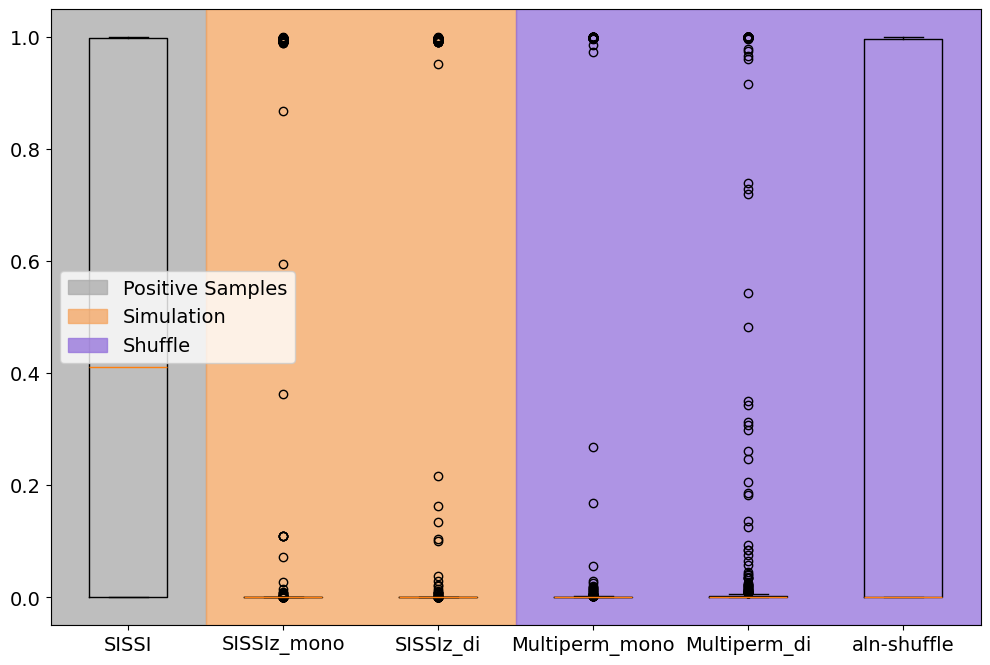

In [76]:
plot_columns('SVM RNA-class probability')

## Structure conservation index (SCI)

/tmp/ipykernel_10948/2611853650.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_10948/2611853650.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_10948/2611853650.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_10948/2611853650.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


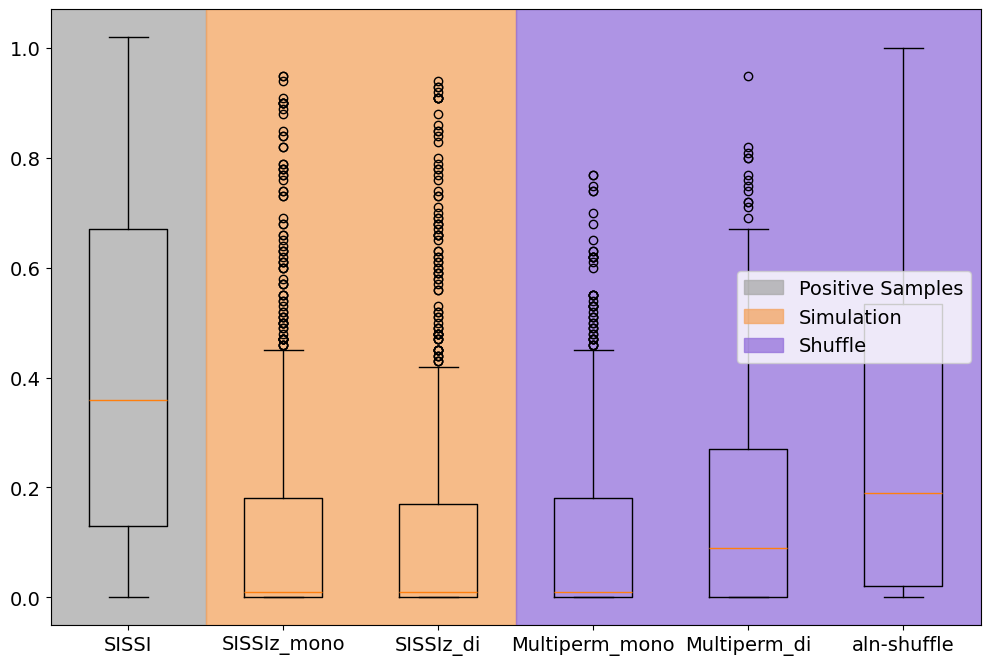

In [77]:
plot_columns('Structure conservation index')

## Mean z-score

/tmp/ipykernel_10948/2611853650.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_10948/2611853650.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_10948/2611853650.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_10948/2611853650.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


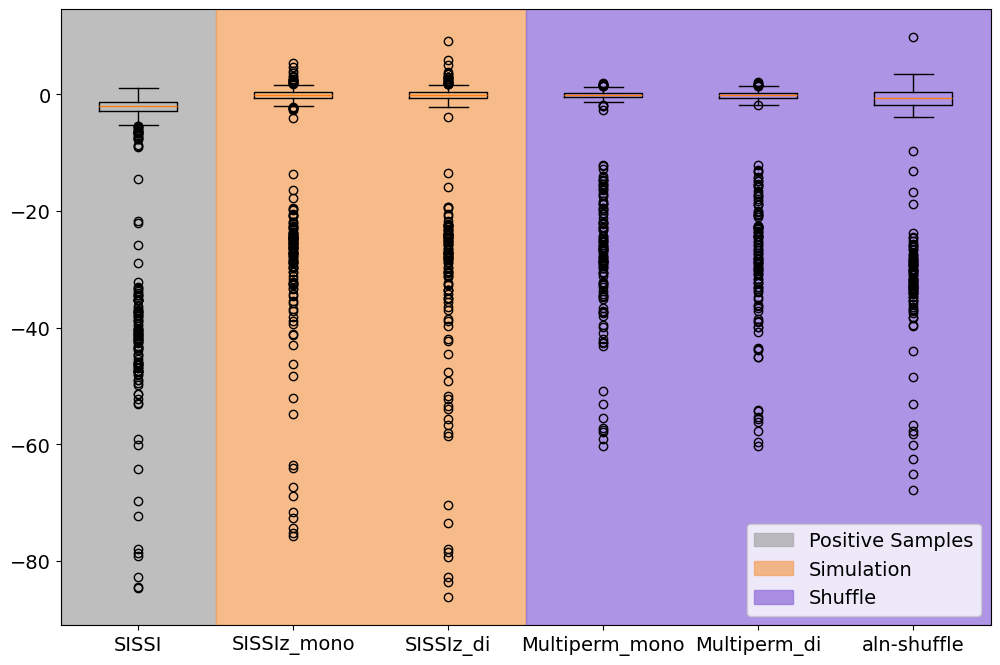

In [78]:
plot_columns('Mean z-score')

## Consensus MFE

/tmp/ipykernel_10948/2611853650.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_10948/2611853650.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_10948/2611853650.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_10948/2611853650.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


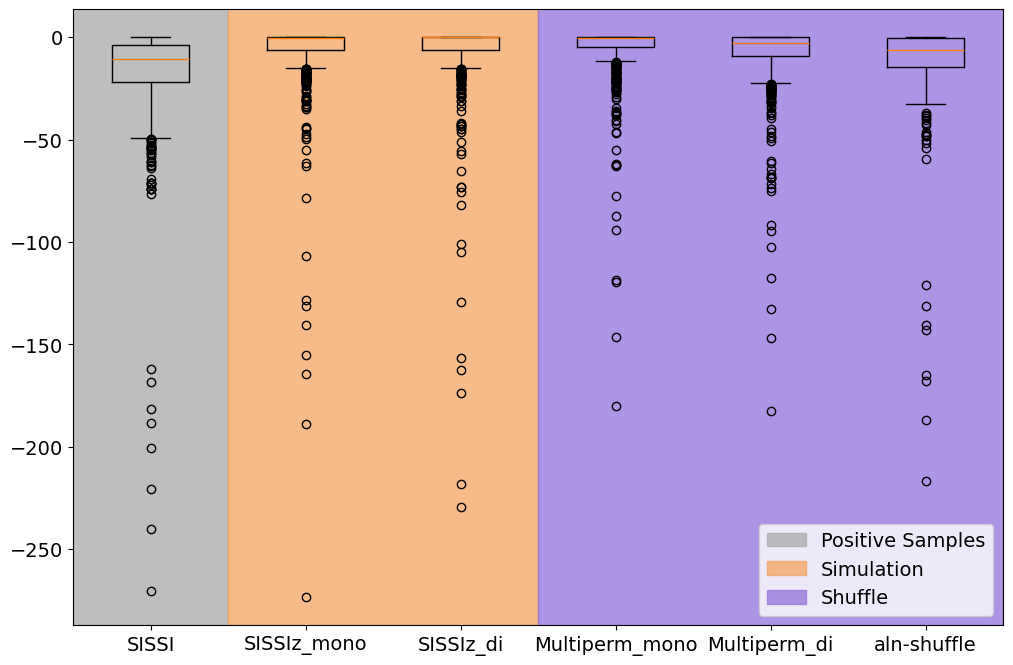

In [79]:
plot_columns('Consensus MFE')

## Mean pairwise identity

/tmp/ipykernel_10948/2611853650.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_10948/2611853650.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_10948/2611853650.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_10948/2611853650.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


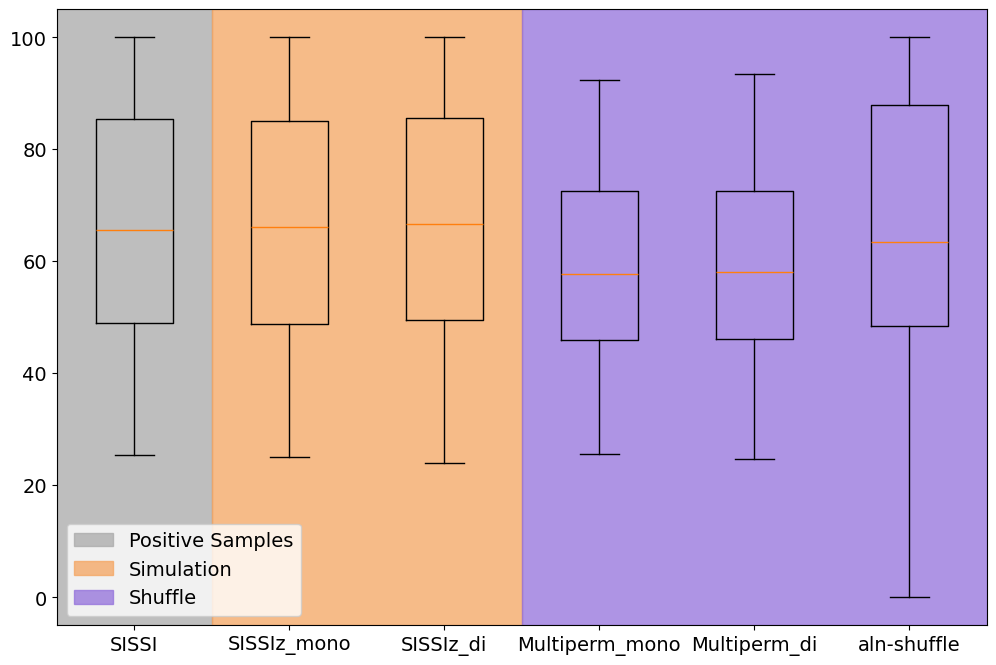

In [80]:
plot_columns('Mean pairwise identity')